In [1]:
%matplotlib inline

In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from datetime import timedelta, datetime


In [3]:
import time

In [4]:
fakedatetime = datetime(100,1,1,00,10,00) 
timeinterval = 10


In [7]:
def plot_traffic(logfiles):
    fig,axs =  plt.subplots(len(logfiles),figsize=(20,20),sharex=True)
    plt.xticks(rotation='vertical')
    plt.subplots_adjust( wspace=1, hspace=1)

    for indx,fil in enumerate(logfiles):
        df = pd.read_csv(f'{fil}')
        y_max = df['pixels'].max()
        df = df[['ts','low','med','high']]
        df.columns = ['ts','greenBars','orangeBars','redBars']
        steps_toskip = 2
        r = list(range(0,df.shape[0],steps_toskip))
        # From raw value to percentage
        totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['redBars'])]
        totals = [max(totals)]*len(totals)
        totals = totals[::steps_toskip]
        greenBars = [i / j * 100 for i,j in zip(df['greenBars'][::steps_toskip], totals)]
        orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'][::steps_toskip], totals)]
        redBars = [i / j * 100 for i,j in zip(df['redBars'][::steps_toskip], totals)]

        # plot
        barWidth = 0.85
        timeframes = df['ts'].values.tolist()[::steps_toskip]
        timeframes = tuple((timeframes))
        timeframes = [timeframe.split()[-1] for timeframe in timeframes]

        base = fakedatetime
        timeframes = [(base + timedelta(0,minutes=timeinterval*deltamultiplier)).strftime("%H:%M") for deltamultiplier in r]

        # Create green Bars
        axs[indx].bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="mild traffic")
        # Create orange Bars
        axs[indx].bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="medium traffic")
        # Create blue Bars
        axs[indx].bar(r, redBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='red', edgecolor='white', width=barWidth, label="high traffic")

        axs[indx].set_xticks(r)
        axs[indx].set_xticklabels(timeframes,rotation='vertical')
        axs[indx].autoscale(tight=True)

        location = Path(fil).parts[1]

        axs[indx].set_ylabel(str(location),rotation=0,labelpad=90,fontsize=20)

        # Hide the right and top spines
        axs[indx].spines['right'].set_visible(False)
        axs[indx].spines['top'].set_visible(False)

        # Only show ticks on the left and bottom spines
        # axs[indx].yaxis.set_ticks_position('left')
        # axs[indx].xaxis.set_ticks_position('bottom')

        handles, labels = axs[indx].get_legend_handles_labels()

    fig.suptitle(f'{str(Path(fil).stem).replace("_log","")}.png', fontsize=16)
    fig.legend(handles, labels, loc='upper left',bbox_to_anchor=(1,1), ncol=1)
    fig.tight_layout() 
    
    plt.savefig(f'{Path(fil).stem}.png')

#     fig.save(f'{Path(fil).stem}')

KeyboardInterrupt: 

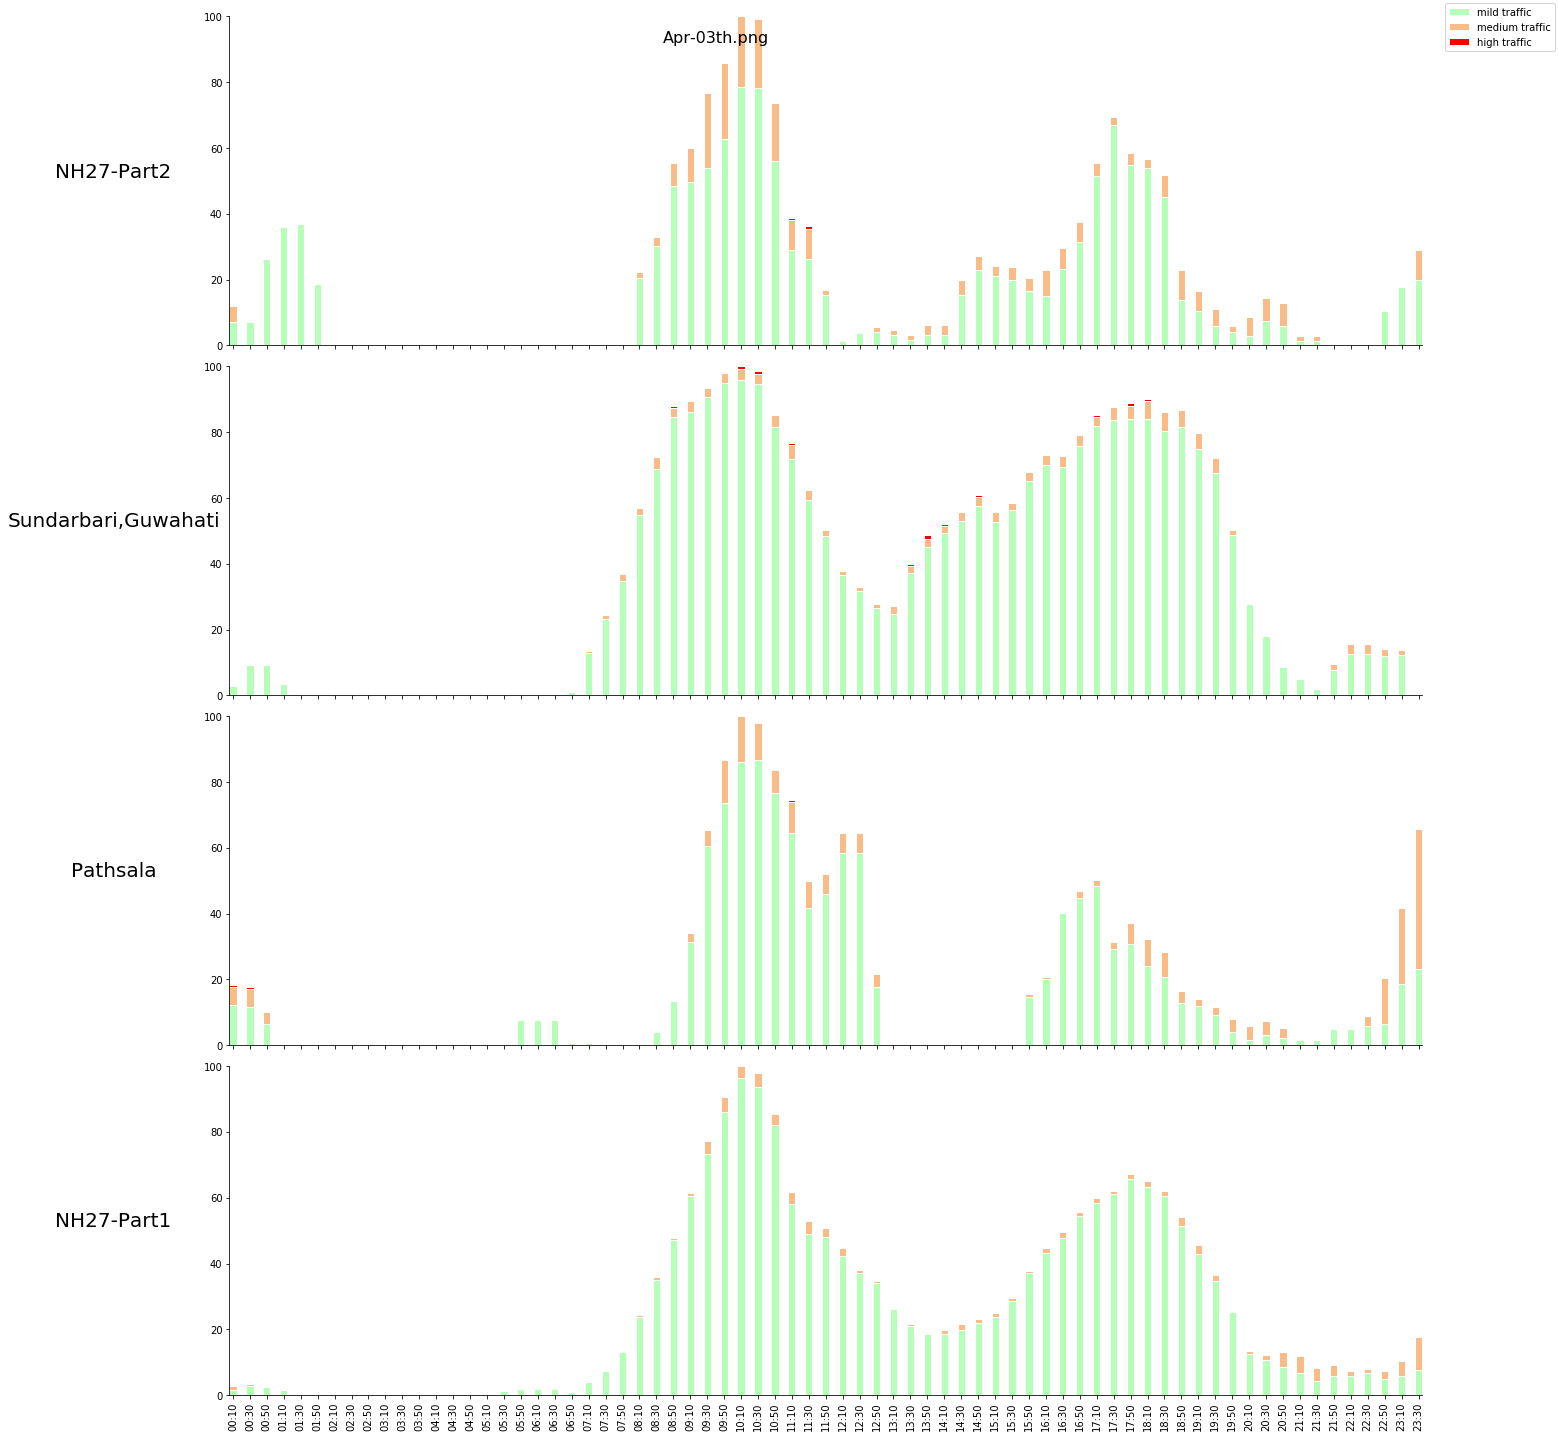

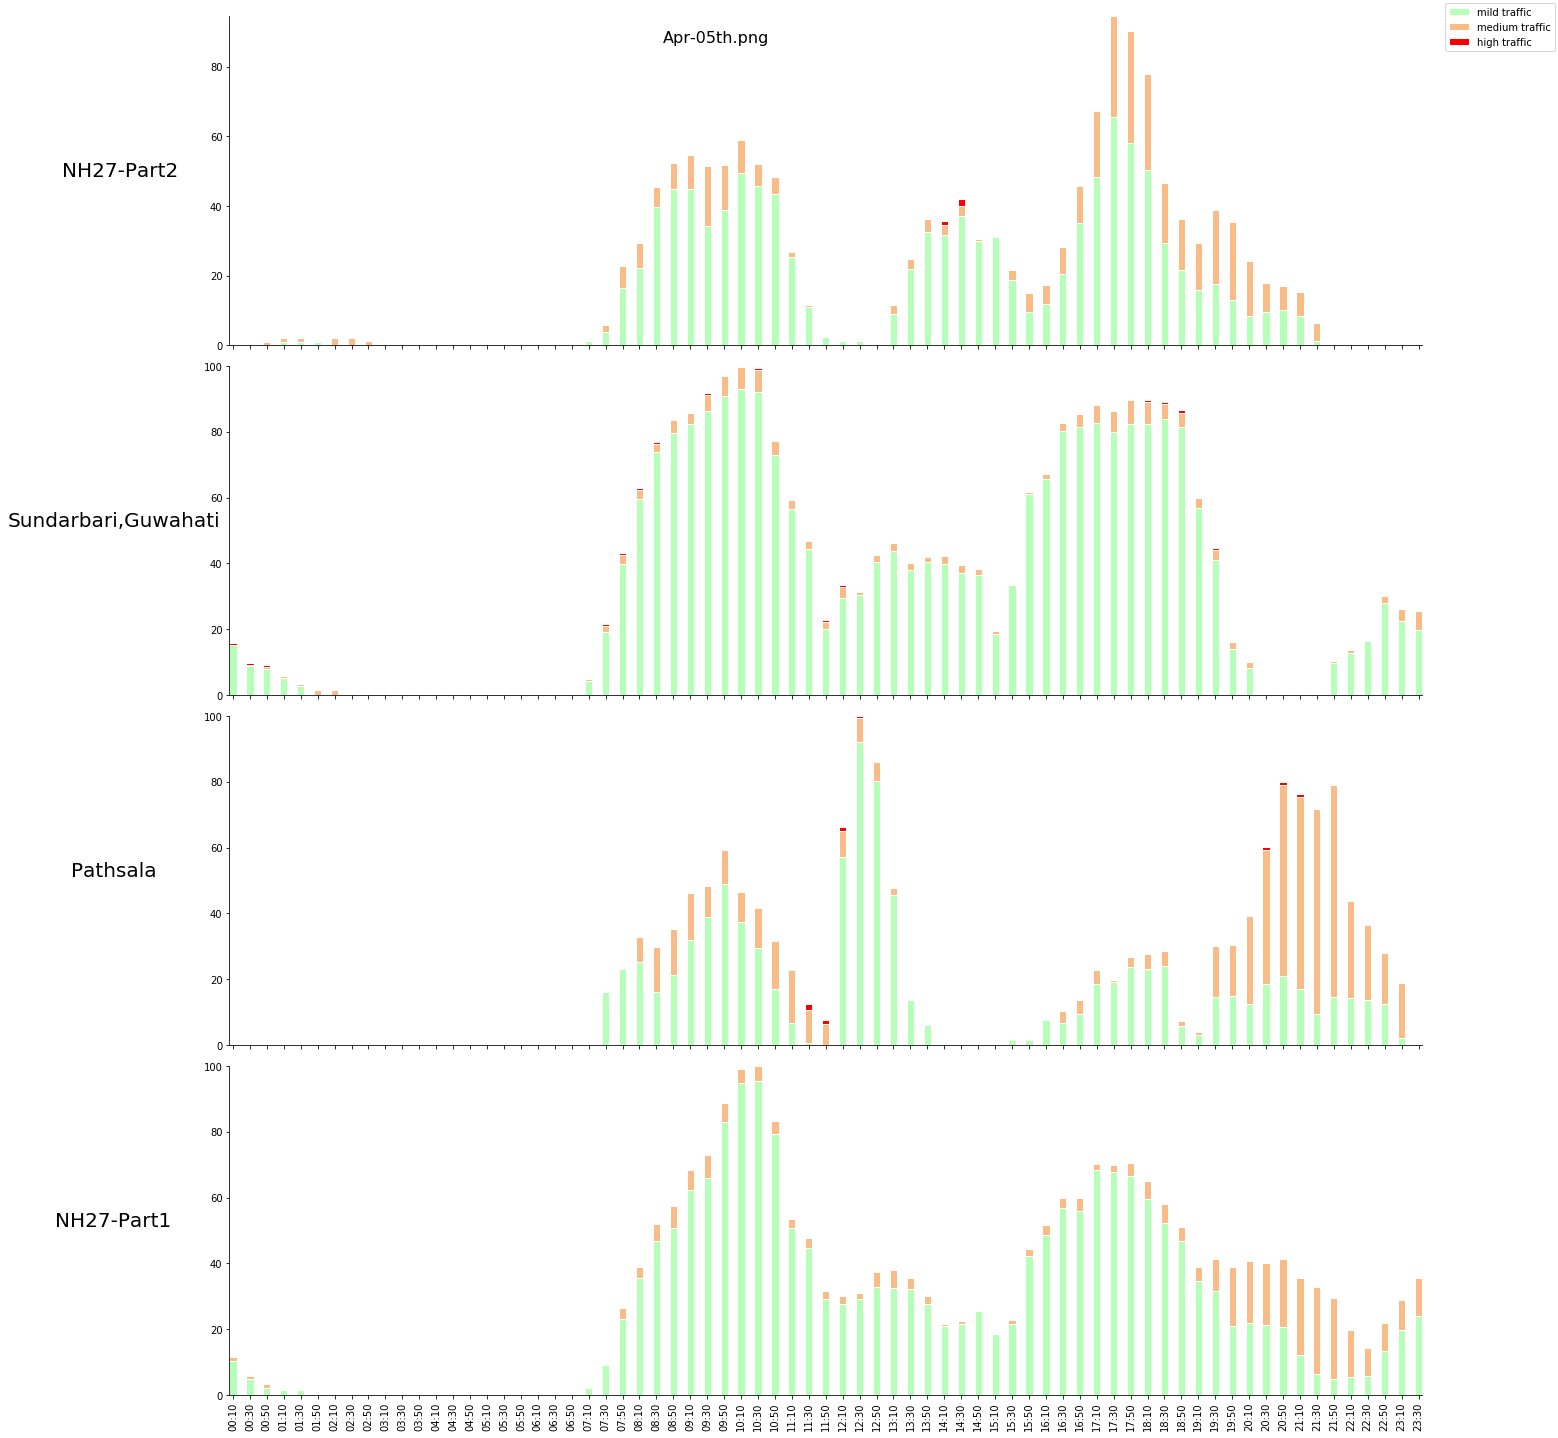

In [8]:
from glob import glob
from pathlib import Path

all_logs = glob("logs/*/*")
dates, datebasedfiles = [],{}

for loc in all_logs:
    date = Path(loc).stem.split("_")[0]
    if date not in dates: 
        dates.append(date)
        datebasedfiles[date] = datebasedfiles.get(date,[]) + [pathe for pathe in all_logs if date in pathe]
    else: pass
    

for date in dates:
    logfiles = datebasedfiles[date]
    plot_traffic(logfiles)
    time.sleep(30)